# Topic Modeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from pprint import pprint
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import PorterStemmer
import nltk
import spacy
nltk.download('wordnet')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Peerawat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data = pd.read_csv('yelp_cleaned.csv')

In [4]:
data.head()

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_review_count,business_stars,date,review_id,...,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,user_id,categories,all_text
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,116,4.0,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,...,322,331,Jason,376,1034,5,wife took birthday breakfast excel weather per...,rLtl8ZkDX5vH5nAx9C3q5Q,"Breakfast & Brunch, Restaurants",breakfast brunch restaur wife took birthday br...
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,102,4.0,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,...,0,2,Paul,2,0,5,idea peopl give bad review place goe show plea...,0a2KyEL0d3Yb1V6aivbIuQ,"Italian, Pizza, Restaurants",italian pizza restaur idea peopl give bad revi...
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,265,4.5,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,...,0,0,Nicole,3,3,4,love gyro plate rice good also dig candi select,0hT2KtfLiobPvh6cDC8JQg,"Middle Eastern, Restaurants",middl eastern restaur love gyro plate rice goo...
3,Wine Bars; Bars; American (New); Nightlife; Re...,Phoenix,-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,Quiessence Restaurant,109,3.5,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,...,1121,743,Deborah,654,1584,4,quiessenc simpli put beauti full window earthi...,sqYN3lNgvPbPCTRsMFu27g,"Wine Bars, Bars, American (New), Nightlife, Re...",wine bar bar american new nightlif restaur qui...
4,Mexican; Restaurants,Phoenix,zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,La Condesa Gourmet Taco Shop,307,4.0,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,...,1200,1187,Monique,295,1376,5,drop drive ate go back next day food good cute...,wFweIWhv2fREZV_dYkz_1g,"Mexican, Restaurants",mexican restaur drop drive ate go back next da...


In [5]:
data.shape

(135585, 21)

In [6]:
def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos = 'v'))

In [7]:
lemmatize_stemming(data['text'][0])

'wife took birthday breakfast excel weather perfect made sit outsid overlook ground absolut pleasur waitress excel food arriv quickli semi busi saturday morn look like place fill pretti quickli earlier get better favor get bloodi mari phenomen simpli best ever pretti sure use ingredi garden blend fresh order amaz everyth menu look excel white truffl scrambl egg veget skillet tasti delici came piec griddl bread amaz absolut made meal complet best toast ever anyway wait go back'

In [8]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [9]:
preprocess(data['text'][0])

['wife',
 'take',
 'birthday',
 'breakfast',
 'excel',
 'weather',
 'perfect',
 'outsid',
 'overlook',
 'grind',
 'absolut',
 'pleasur',
 'waitress',
 'excel',
 'food',
 'arriv',
 'quickli',
 'semi',
 'busi',
 'saturday',
 'morn',
 'look',
 'like',
 'place',
 'pretti',
 'quickli',
 'earlier',
 'better',
 'favor',
 'bloodi',
 'mari',
 'phenomen',
 'simpli',
 'best',
 'pretti',
 'sure',
 'ingredi',
 'garden',
 'blend',
 'fresh',
 'order',
 'amaz',
 'everyth',
 'menu',
 'look',
 'excel',
 'white',
 'truffl',
 'scrambl',
 'veget',
 'skillet',
 'tasti',
 'delici',
 'come',
 'piec',
 'griddl',
 'bread',
 'amaz',
 'absolut',
 'meal',
 'complet',
 'best',
 'toast',
 'wait']

In [10]:
sample = data.loc[0]['text']
print('Original Document: ')
print(sample)
words = []
for w in sample.split(' '):
    words.append(w)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(sample))

Original Document: 
wife took birthday breakfast excel weather perfect made sit outsid overlook ground absolut pleasur waitress excel food arriv quickli semi busi saturday morn look like place fill pretti quickli earlier get better favor get bloodi mari phenomen simpli best ever pretti sure use ingredi garden blend fresh order amaz everyth menu look excel white truffl scrambl egg veget skillet tasti delici came piec griddl bread amaz absolut made meal complet best toast ever anyway wait go back


 tokenized and lemmatized document: 
['wife', 'take', 'birthday', 'breakfast', 'excel', 'weather', 'perfect', 'outsid', 'overlook', 'grind', 'absolut', 'pleasur', 'waitress', 'excel', 'food', 'arriv', 'quickli', 'semi', 'busi', 'saturday', 'morn', 'look', 'like', 'place', 'pretti', 'quickli', 'earlier', 'better', 'favor', 'bloodi', 'mari', 'phenomen', 'simpli', 'best', 'pretti', 'sure', 'ingredi', 'garden', 'blend', 'fresh', 'order', 'amaz', 'everyth', 'menu', 'look', 'excel', 'white', 'truffl

In [11]:
# There are 4 null values, so we have to drop it first
data['text'].isnull().sum()

4

In [12]:
# Noe the null value is gone
data = data.dropna()
data.isnull().sum()

business_categories       0
business_city             0
business_id               0
business_latitude         0
business_longitude        0
business_name             0
business_review_count     0
business_stars            0
date                      0
review_id                 0
reviewer_average_stars    0
reviewer_cool             0
reviewer_funny            0
reviewer_name             0
reviewer_review_count     0
reviewer_useful           0
stars                     0
text                      0
user_id                   0
categories                0
all_text                  0
dtype: int64

In [13]:
preprocess_doc_text = data['text'].map(preprocess)
preprocess_doc_text[:10]

0    [wife, take, birthday, breakfast, excel, weath...
1    [idea, peopl, review, place, plea, everyon, pr...
2       [love, gyro, plate, rice, good, candi, select]
3    [quiessenc, simpli, beauti, window, earthi, wo...
4    [drop, drive, food, good, cute, littl, green, ...
5    [definit, come, happi, hour, price, amaz, sake...
6    [nobuo, uniqu, talent, everyth, menu, care, cr...
7    [wonder, vietnam, sandwich, shopp, baguett, gr...
8    [limit, time, thing, right, chicken, pizza, su...
9    [week, phoenix, look, irish, town, rosi, decor...
Name: text, dtype: object

In [14]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(preprocess_doc_text, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[preprocess_doc_text], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(preprocess_doc_text)  # processed Text Data!

In [15]:
# Create Dictionary

id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency

corpus = [id2word.doc2bow(text) for text in data_ready]

In [22]:
# Build LDA model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=42,
                                           chunksize=250,
                                           passes=5,
                                           alpha='auto',
                                           iterations=10,
                                           per_word_topics=False)

C:\Users\Peerawat\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Peerawat\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


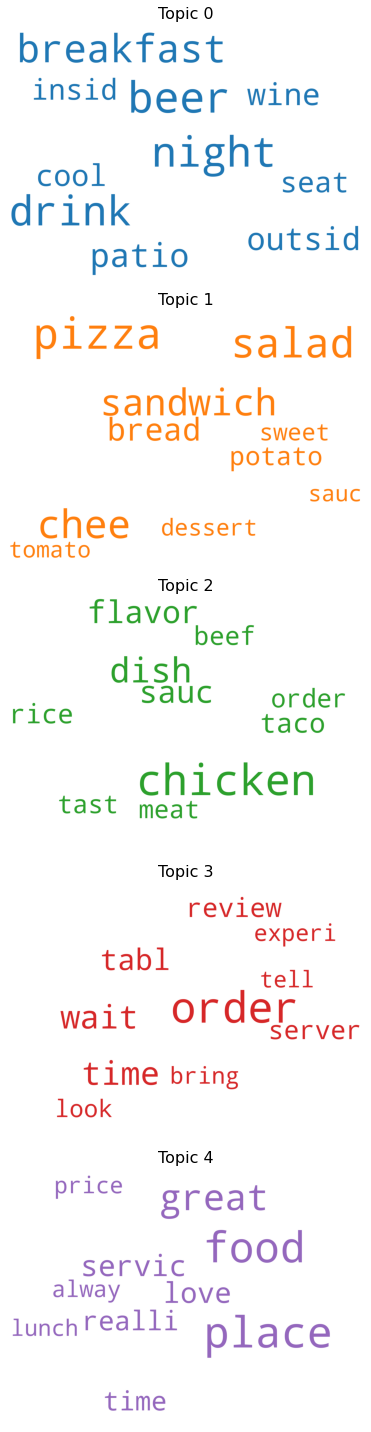

In [23]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 1, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [24]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

C:\Users\Peerawat\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.166627  0.162412       1        1  32.560836
3      0.177812  0.163542       2        1  30.358892
2     -0.254691  0.048248       3        1  13.775616
0      0.193244 -0.314444       4        1  12.846613
1     -0.282992 -0.059758       5        1  10.458043, topic_info=        Term           Freq          Total Category  logprob  loglift
29     place  108824.000000  108824.000000  Default  30.0000  30.0000
14      food  112055.000000  112055.000000  Default  29.0000  29.0000
62     great   72928.000000   72928.000000  Default  28.0000  28.0000
303  chicken   33653.000000   33653.000000  Default  27.0000  27.0000
73     pizza   29024.000000   29024.000000  Default  26.0000  26.0000
..       ...            ...            ...      ...      ...      ...
144     meat    4140.938964   14839.430394   Topic5  -5.0377   0.9814
224   flavor    4359.905405   21052.243046   Topic5  -4.9861   0.6832
176     tast    4384.010978   25203.778962   Topic5  -4.9806   0.5088
26   perfect    3831.541704   11687.559284   Topic5  -5.1153   1.1425
24     order    3631.763321   67950.702328   Topic5  -5.1689  -0.6713

[307 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
353       1  0.178621  actual
353       2  0.781468  actual
353       3  0.026557  actual
353       4  0.012098  actual
353       5  0.001279  actual
...     ...       ...     ...
393       4  0.687455    wing
393       5  0.312464    wing
1184      1  0.990212   worth
1184      5  0.009733   worth
1666      2  0.999910   write

[462 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 1, 2])

In [30]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [128]:
df_dominant_topic = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

C:\Users\Peerawat\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
df_dominant_topic = df_dominant_topic.rename(columns = {'Dominant_Topic':'dominant_topic', 'Topic_Keywords':'topic_keywords', 0: 'text_list'})
df_dominant_topic

C:\Users\Peerawat\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,dominant_topic,topic_keywords,text_list
0,4.0,"place, food, great, servic, love, realli, time...","[wife, birthday, breakfast, excel, weather, pe..."
1,3.0,"order, time, wait, tabl, review, server, look,...","[idea, peopl, review, place, plea, everyon, pr..."
2,4.0,"place, food, great, servic, love, realli, time...","[love, gyro, plate, rice, candi, select]"
3,3.0,"order, time, wait, tabl, review, server, look,...","[quiessenc, simpli, beauti, window, earthi, wo..."
4,2.0,"chicken, dish, flavor, sauc, taco, rice, beef,...","[drop, drive, food, cute, littl, green, build,..."
...,...,...,...
135576,3.0,"order, time, wait, tabl, review, server, look,...","[stop, serv, breakfast, vegetarian, lunch, ite..."
135577,3.0,"order, time, wait, tabl, review, server, look,...","[final, happen, area, husband, coupl, week, de..."
135578,3.0,"order, time, wait, tabl, review, server, look,...","[coff, breakfast, toast, instead, bacon, bacon..."
135579,4.0,"place, food, great, servic, love, realli, time...","[cool, atmosph, beer, food, saturday, great, f..."


In [132]:
data = data.reset_index().drop(columns = ['index'])
data.head()

C:\Users\Peerawat\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_review_count,business_stars,date,review_id,...,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,user_id,categories,all_text
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,116,4.0,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,...,322,331,Jason,376,1034,5,wife took birthday breakfast excel weather per...,rLtl8ZkDX5vH5nAx9C3q5Q,"Breakfast & Brunch, Restaurants",breakfast brunch restaur wife took birthday br...
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,102,4.0,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,...,0,2,Paul,2,0,5,idea peopl give bad review place goe show plea...,0a2KyEL0d3Yb1V6aivbIuQ,"Italian, Pizza, Restaurants",italian pizza restaur idea peopl give bad revi...
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,265,4.5,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,...,0,0,Nicole,3,3,4,love gyro plate rice good also dig candi select,0hT2KtfLiobPvh6cDC8JQg,"Middle Eastern, Restaurants",middl eastern restaur love gyro plate rice goo...
3,Wine Bars; Bars; American (New); Nightlife; Re...,Phoenix,-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,Quiessence Restaurant,109,3.5,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,...,1121,743,Deborah,654,1584,4,quiessenc simpli put beauti full window earthi...,sqYN3lNgvPbPCTRsMFu27g,"Wine Bars, Bars, American (New), Nightlife, Re...",wine bar bar american new nightlif restaur qui...
4,Mexican; Restaurants,Phoenix,zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,La Condesa Gourmet Taco Shop,307,4.0,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,...,1200,1187,Monique,295,1376,5,drop drive ate go back next day food good cute...,wFweIWhv2fREZV_dYkz_1g,"Mexican, Restaurants",mexican restaur drop drive ate go back next da...


In [131]:
final_data = pd.concat([data, df_dominant_topic], axis = 1)
final_data

C:\Users\Peerawat\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_review_count,business_stars,date,review_id,...,reviewer_review_count,reviewer_useful,stars,text,user_id,categories,all_text,dominant_topic,topic_keywords,text_list
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,116,4.0,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,...,376,1034,5,wife took birthday breakfast excel weather per...,rLtl8ZkDX5vH5nAx9C3q5Q,"Breakfast & Brunch, Restaurants",breakfast brunch restaur wife took birthday br...,4.0,"place, food, great, servic, love, realli, time...","[wife, birthday, breakfast, excel, weather, pe..."
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,102,4.0,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,...,2,0,5,idea peopl give bad review place goe show plea...,0a2KyEL0d3Yb1V6aivbIuQ,"Italian, Pizza, Restaurants",italian pizza restaur idea peopl give bad revi...,3.0,"order, time, wait, tabl, review, server, look,...","[idea, peopl, review, place, plea, everyon, pr..."
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,265,4.5,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,...,3,3,4,love gyro plate rice good also dig candi select,0hT2KtfLiobPvh6cDC8JQg,"Middle Eastern, Restaurants",middl eastern restaur love gyro plate rice goo...,4.0,"place, food, great, servic, love, realli, time...","[love, gyro, plate, rice, candi, select]"
3,Wine Bars; Bars; American (New); Nightlife; Re...,Phoenix,-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,Quiessence Restaurant,109,3.5,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,...,654,1584,4,quiessenc simpli put beauti full window earthi...,sqYN3lNgvPbPCTRsMFu27g,"Wine Bars, Bars, American (New), Nightlife, Re...",wine bar bar american new nightlif restaur qui...,3.0,"order, time, wait, tabl, review, server, look,...","[quiessenc, simpli, beauti, window, earthi, wo..."
4,Mexican; Restaurants,Phoenix,zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,La Condesa Gourmet Taco Shop,307,4.0,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,...,295,1376,5,drop drive ate go back next day food good cute...,wFweIWhv2fREZV_dYkz_1g,"Mexican, Restaurants",mexican restaur drop drive ate go back next da...,2.0,"chicken, dish, flavor, sauc, taco, rice, beef,...","[drop, drive, food, cute, littl, green, build,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135576,Bakeries; Food; Sandwiches; Restaurants,Phoenix,j5HLcBru7FEirYJPbKFVWA,33.603263,-111.978179,Breadcrafters Bakery & Cafe,40,3.5,2009-10-07,PzVTbuN_MP_wx9MwQnIZDA,...,169,622,2,stop serv breakfast vegetarian lunch item cold...,UoBfwbXaixelZBghbJ2cSg,"Bakeries, Food, Sandwiches, Restaurants",bakeri food sandwich restaur stop serv breakfa...,3.0,"order, time, wait, tabl, review, server, look,...","[stop, serv, breakfast, vegetarian, lunch, ite..."
135577,American (New); Restaurants,Scottsdale,FV0BkoGOd3Yu_eJnXY15ZA,33.499499,-111.927402,Cowboy Ciao,349,4.0,2010-06-02,AoAQ9sqH9AandCGPNJ3mGw,...,12,10,2,want tri cowboy ciao final happen area husband...,tTO6rv0Z9aNNYmmZU_BR4g,"American (New), Restaurants",american new restaur want tri cowboy ciao fina...,3.0,"order, time, wait, tabl, review, server, look,...","[final, happen, area, husband, coupl, week, de..."
135578,Breakfast & Brunch; Restaurants,Phoenix,Y-9dJvw-J2d9QKfuL7mKgA,33.494820,-111.979821,Over Easy,310,3.5,2008-02-03,A1Y7yT_kgj391Xa1jcKzmw,...,114,231,1,coffe good two egg breakfast ask toast instead...,CAlxnkAuqNetlUmWtCQ_eQ,"Breakfast & Brunch, Restaurants",breakfast brunch restaur coff good two egg bre...,3.0,"order, time, wait, tabl, review, server, look,...","[coff, breakfast, toast, instead, bacon, bacon..."
135579,Pubs; Bars; American (Traditional); Nightlife;...,Tempe,-EctXOb3B7T177jGYUhjVA,33.407561,-111.947525,Boulders On Broadway,139,4.0,2010-10-11,JmR3yk7JlS1LVVxtIc3xBQ,...,4,2,4,cool atmospher lot beer tap good food went s

In [140]:
final_data[final_data['dominant_topic'] == 1]['categories'].value_counts()

C:\Users\Peerawat\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pizza, Restaurants                                          910
Italian, Pizza, Restaurants                                 473
Sandwiches, Restaurants                                     294
American (New), Restaurants                                 278
Restaurants, Italian                                        267
                                                           ... 
Piano Bars, Seafood, Steakhouses, Nightlife, Restaurants      1
Pizza, Buffets, Restaurants                                   1
American (Traditional), Tex-Mex, Restaurants                  1
Cafes, American (New), Restaurants                            1
Asian Fusion, Chinese, Restaurants                            1
Name: categories, Length: 307, dtype: int64

In [73]:
final_data.isnull().sum()

C:\Users\Peerawat\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


business_categories       0
business_city             0
business_id               0
business_latitude         0
business_longitude        0
business_name             0
business_review_count     0
business_stars            0
date                      0
review_id                 0
reviewer_average_stars    0
reviewer_cool             0
reviewer_funny            0
reviewer_name             0
reviewer_review_count     0
reviewer_useful           0
stars                     0
text                      0
user_id                   0
categories                0
all_text                  0
dominant_topic            0
topic_keywords            0
text_list                 0
dtype: int64

In [74]:
final_data.to_csv('final_data.csv', index = False)

C:\Users\Peerawat\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
